EMI for loan amount 500000 at 8% interest: 6066.38
Outstanding balance after 60 months: 299184.34
Interest lost per month if loan is closed after 60 months: 9413.31


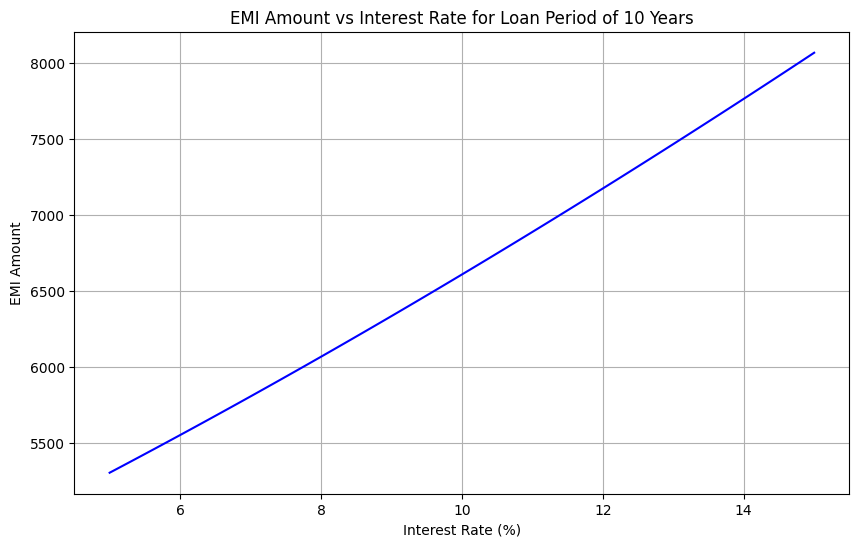

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define a class to represent a Housing Loan Scheme
class HousingLoan:
    def __init__(self, loan_amount, annual_interest_rate, loan_period_years):
        self.loan_amount = loan_amount
        self.annual_interest_rate = annual_interest_rate
        self.loan_period_years = loan_period_years
        self.loan_period_months = loan_period_years * 12
        self.monthly_interest_rate = annual_interest_rate / 12 / 100
        self.emi = self.calculate_emi()

    def calculate_emi(self):
        # EMI calculation using the formula:
        # EMI = [P * r * (1+r)^n] / [(1+r)^n – 1]
        r = self.monthly_interest_rate
        n = self.loan_period_months
        P = self.loan_amount
        emi = (P * r * (1 + r)**n) / ((1 + r)**n - 1)
        return emi

    def calculate_outstanding_balance(self, months_paid):
        # Calculate outstanding balance after a certain number of payments
        r = self.monthly_interest_rate
        n = self.loan_period_months
        P = self.loan_amount
        # Formula for remaining balance after 'm' payments
        remaining_balance = (P * ((1 + r)**n - (1 + r)**months_paid)) / ((1 + r)**n - 1)
        return remaining_balance

    def calculate_interest_lost(self, months_paid):
        # Calculate the interest lost when closing the loan earlier
        total_paid = self.emi * months_paid
        remaining_balance = self.calculate_outstanding_balance(months_paid)
        interest_lost = self.loan_amount + (self.emi * self.loan_period_months) - (total_paid + remaining_balance)
        return interest_lost / (self.loan_period_months - months_paid)

# Function to plot EMI chart based on interest rate and period
def plot_emi_vs_interest(loan_amount, loan_period_years):
    interest_rates = np.linspace(5, 15, 100)  # Interest rates from 5% to 15%
    emis = []

    for rate in interest_rates:
        loan = HousingLoan(loan_amount, rate, loan_period_years)
        emis.append(loan.emi)

    plt.figure(figsize=(10, 6))
    plt.plot(interest_rates, emis, label='EMI', color='blue')
    plt.xlabel('Interest Rate (%)')
    plt.ylabel('EMI Amount')
    plt.title('EMI Amount vs Interest Rate for Loan Period of {} Years'.format(loan_period_years))
    plt.grid(True)
    plt.show()

# Assuming suitable data and inputs for demonstration
loan_amount = 500000  # Example loan amount
loan_period_years = 10  # Example loan period (years)
annual_interest_rate = 8  # Example interest rate

# Create a loan object
loan = HousingLoan(loan_amount, annual_interest_rate, loan_period_years)

# Print EMI and outstanding balance after 5 years of payment
months_paid = 5 * 12
outstanding_balance = loan.calculate_outstanding_balance(months_paid)
interest_lost = loan.calculate_interest_lost(months_paid)

# Display EMI and plot EMI vs Interest Rate chart
print(f"EMI for loan amount {loan_amount} at {annual_interest_rate}% interest: {loan.emi:.2f}")
print(f"Outstanding balance after {months_paid} months: {outstanding_balance:.2f}")
print(f"Interest lost per month if loan is closed after {months_paid} months: {interest_lost:.2f}")

# Plot the EMI vs Interest Rate chart
plot_emi_vs_interest(loan_amount, loan_period_years)
